## BIG MART SALES PREDICTION
#### By: Naveen B

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. 
Also, certain attributes of each product and store have been defined. 
The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


### Hypothesis Generation

Make it a practice to do this before solving any ML problem. 
Ideally,before seeing the data or else, you might end up with biased hypotheses.

What could affect the target variable (sales)?

1. Time of week : Weekends usually are more busy
2. Time of day  : Higher sales in the mornings and late evenings
3. Time of year : Higher sales at end of the year 
4. Store size and location
5. Items with more shelf space

#### Loading necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error

#### Importing Train and Test datadet

In [2]:
train=pd.read_csv("bigmart_train.csv") #train data
test=pd.read_csv("bigmart_test.csv")   #test data

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.shape,test.shape #Shape of train and test data

((8523, 12), (5681, 11))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


#### Five number summary for train data

In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### Checking for Missing values

In [9]:
train.isnull().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Bi-Variate Analysis

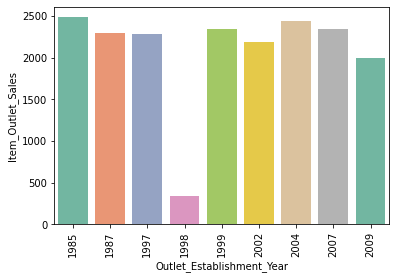

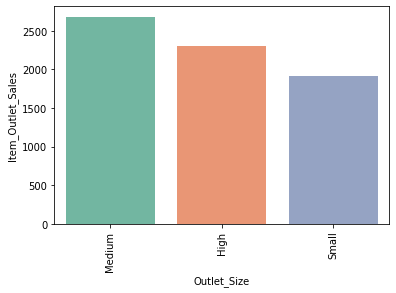

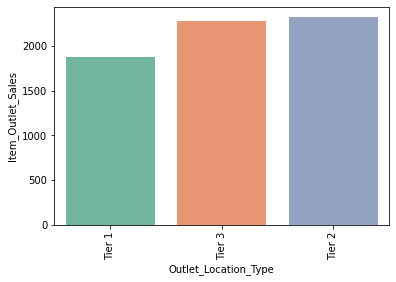

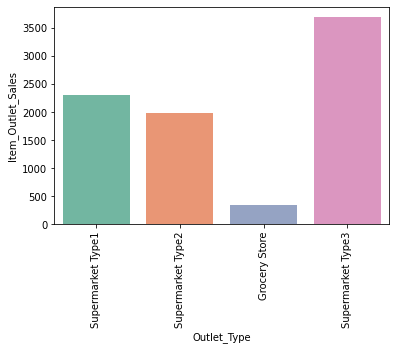

In [11]:
for i in train[['Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']].columns:
    chart = sns.barplot(x=train[i], y=train['Item_Outlet_Sales'],ci=None,palette="Set2")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

#### Insights observed from bi-variate analysis
- Grocery store has a really low sales.
- Teir-1 location type has comparatively low sales.
- In year 1998 we can see has low sales.
- small outlet size has comparatively low sales

##### Missing values imputation

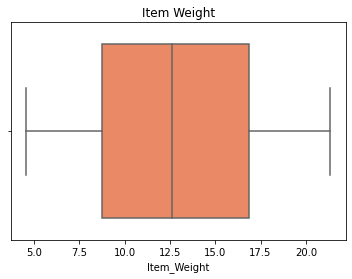

In [12]:
sns.boxplot(train.Item_Weight,color="coral");
plt.title("Item Weight");

##### Imputing missing in item weight values with mean of the weight as its normally distributed with low standard deviation

In [13]:
train["Item_Weight"]=train["Item_Weight"].fillna(train["Item_Weight"].mean()) 
test["Item_Weight"]=test["Item_Weight"].fillna(train["Item_Weight"].mean())

##### Imputing missing values in Outlet Size mode as its a nominal data type

In [14]:
train["Outlet_Size"]=train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])
test["Outlet_Size"]=test["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])

In [15]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

##### Replacing contents in Item fat content feature to uniform format

In [17]:
train.Item_Fat_Content.replace({"low fat":"Low Fat","reg":"Regular","LF":"Low Fat"},inplace=True)
test.Item_Fat_Content.replace({"low fat":"Low Fat","reg":"Regular","LF":"Low Fat"},inplace=True)

In [18]:
train.Outlet_Size.unique() # There are three types of Outletsize

array(['Medium', 'High', 'Small'], dtype=object)

In [19]:
train.Outlet_Location_Type.unique() # There are three types of Outlet Location type

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [20]:
train.Outlet_Type.unique() # There are four types of Outlet type

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

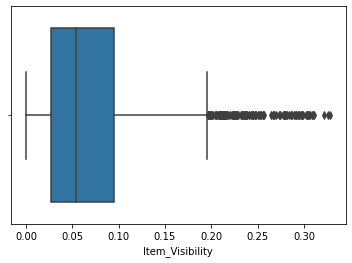

In [21]:
sns.boxplot(train.Item_Visibility); #Item visibility feature has more extreme values

In [22]:
q1=train.Item_Visibility.quantile(.25)
q3=train.Item_Visibility.quantile(.75)
iqr=q3-q1
train=train.query('(@q1 - 1.5*@iqr) <= Item_Visibility <= (@q3 + 1.5*@iqr)' ) #Capping extreme values in Item visibility feature using IQR

In [23]:
train.Item_Visibility=train.Item_Visibility.replace({0 : np.nan}) #Zero Item visibility is not possible lets replace them with minimum visibility

In [24]:
train.Item_Visibility=train.Item_Visibility.fillna(train.Item_Visibility.min())

##### Binning Item visibility feature into category

In [25]:
train.Item_Visibility=pd.cut(train.Item_Visibility,bins=[0,.06,1,2],labels=["Low visiblity","Medium visiblity","High visiblity"],include_lowest=True)


In [26]:
test.Item_Visibility=pd.cut(test.Item_Visibility,bins=[0,.06,1,2],labels=["Low visiblity","Medium visiblity","High visiblity"],include_lowest=True)


##### Deriving Establishmnet age from Outlet_Establishment_Year

In [27]:
train["Establishment_age"]=2020-train.Outlet_Establishment_Year
test["Establishment_age"]=2020-test.Outlet_Establishment_Year

### Encoding Categorical features

In [28]:
le=LabelEncoder()

In [29]:
train.Item_Fat_Content=le.fit_transform(train.Item_Fat_Content)

In [30]:
test.Item_Fat_Content=le.transform(test.Item_Fat_Content)

In [31]:
train.Item_Visibility=train.Item_Visibility.replace({"Low visiblity":1,"Medium visiblity":2,"High visiblity":3})
test.Item_Visibility=test.Item_Visibility.replace({"Low visiblity":1,"Medium visiblity":2,"High visiblity":3})

In [32]:
train.Outlet_Size=train.Outlet_Size.replace({"Small":0,"Medium":1,"High":2})
test.Outlet_Size=test.Outlet_Size.replace({"Small":0,"Medium":1,"High":2})

In [33]:
train.Outlet_Location_Type=train.Outlet_Location_Type.replace({"Tier 1":1,"Tier 2":2,"Tier 3":3})
test.Outlet_Location_Type=test.Outlet_Location_Type.replace({"Tier 1":1,"Tier 2":2,"Tier 3":3})

In [34]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

#### OneHotEncoding

In [35]:
ohe=OneHotEncoder()
ohe.fit(train[["Outlet_Type"]])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [36]:
train_ohe=ohe.transform(train[["Outlet_Type"]]).toarray()
train_ohe=pd.DataFrame(train_ohe,columns=ohe.get_feature_names())
train_ohe.reset_index(drop=True, inplace=True)
train.reset_index(drop=True, inplace=True)
train_encoded=pd.concat([train_ohe,train],axis=1)

In [37]:
test_ohe=ohe.transform(test[["Outlet_Type"]]).toarray()
test_ohe=pd.DataFrame(test_ohe,columns=ohe.get_feature_names())
test_ohe.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
test_encoded=pd.concat([test_ohe,test],axis=1)

In [38]:
train_final=train_encoded.drop(["Item_Identifier","Item_Type","Outlet_Identifier","Outlet_Type"],axis=1) # Dropping Item_Identifier,Item_Type,Outlet_Identifier
test_final=test_encoded.drop(["Item_Identifier","Item_Type","Outlet_Identifier","Outlet_Type"],axis=1)

#### Creating Dependent and Independent Varaiables from dataset

In [39]:
X=train_final.drop("Item_Outlet_Sales",axis=1)
y=train_final.Item_Outlet_Sales

In [40]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8379 entries, 0 to 8378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   x0_Grocery Store           8379 non-null   float64
 1   x0_Supermarket Type1       8379 non-null   float64
 2   x0_Supermarket Type2       8379 non-null   float64
 3   x0_Supermarket Type3       8379 non-null   float64
 4   Item_Weight                8379 non-null   float64
 5   Item_Fat_Content           8379 non-null   int64  
 6   Item_Visibility            8379 non-null   int64  
 7   Item_MRP                   8379 non-null   float64
 8   Outlet_Establishment_Year  8379 non-null   int64  
 9   Outlet_Size                8379 non-null   int64  
 10  Outlet_Location_Type       8379 non-null   int64  
 11  Item_Outlet_Sales          8379 non-null   float64
 12  Establishment_age          8379 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 851.1 KB


### Splitting train dataset in to Training and Validation dataset

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=10)

### Model Building

##### Linear Regression 

In [42]:
lg=LinearRegression()
lg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Linear Regression Model Evaluation

In [43]:
print("R2 value/Coefficient of Determination for validation data:",lg.score(X_test,y_test))

R2 value/Coefficient of Determination for validation data: 0.5564002054243842


In [44]:
print("RMSE for validation data:",np.sqrt(mean_squared_error(y_test,lg.predict(X_test))))

RMSE for validation data: 1127.6728433852395


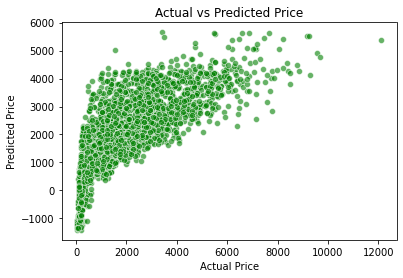

In [45]:
sns.scatterplot(y_test,lg.predict(X_test),color="green",alpha=.6);
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

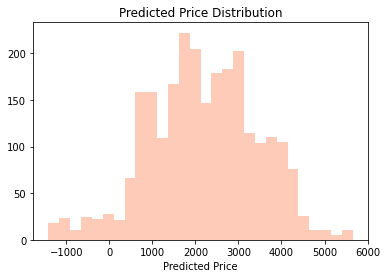

In [46]:
sns.distplot(lg.predict(X_test),color="coral",kde=False);
plt.xlabel("Predicted Price")
plt.title("Predicted Price Distribution")
plt.show()

#### Prediction for Test dataset

In [47]:
test_final["Item_Predicted_Sales"]=lg.predict(test_final)

In [48]:
test_final.head()

,x0_Grocery Store,x0_Supermarket Type1,x0_Supermarket Type2,x0_Supermarket Type3,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Establishment_age,Item_Predicted_Sales
0,0.0,1.0,0.0,0.0,20.750000,0,1,107.8622,1999,1,1,21,1763.018639
1,0.0,1.0,0.0,0.0,8.300000,1,1,87.3198,2007,1,2,13,1544.662790
2,1.0,0.0,0.0,0.0,14.600000,0,2,241.7538,1998,1,3,22,1871.137772
3,0.0,1.0,0.0,0.0,7.315000,0,1,155.0340,2007,1,2,13,2529.534362
4,0.0,0.0,0.0,1.0,12.857645,1,2,234.2300,1985,1,3,35,5190.316666


#### Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

##### RandomForest Regression Model Evaluation

In [51]:
print("R2 value/Coefficient of Determination for validation data:",rf.score(X_test,y_test))
print("RMSE for validation data:",np.sqrt(mean_squared_error(y_test,rf.predict(X_test))))

R2 value/Coefficient of Determination for validation data: 0.5290660736682544
RMSE for validation data: 1161.896498428563


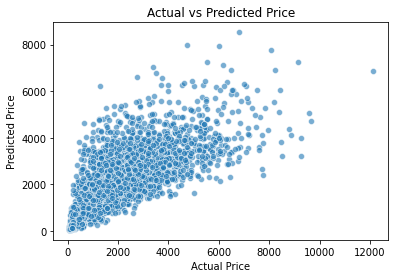

In [52]:
sns.scatterplot(y_test,rf.predict(X_test),palette="Set2",alpha=.6);
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

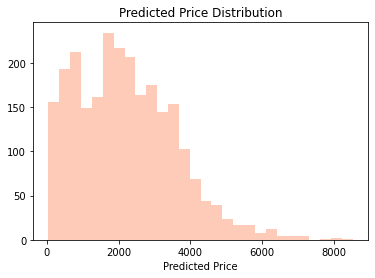

In [53]:
sns.distplot(rf.predict(X_test),color="coral",kde=False);
plt.xlabel("Predicted Price")
plt.title("Predicted Price Distribution")
plt.show()